In [2]:
import pandas as pd 
import numpy as np 

1. Load the dataset contained in the “players1.csv” file (separator:
“;”). Use it as a TRAINING SET. Load the contained dataset into another Pandas DataFrame
of the “players2.csv” file (separator: “;”). Use as loading option:
encoding='ISO-8859-1'. Use this second dataset as a TEST SET

In [3]:
train = pd.read_csv('players1.csv', sep=';', encoding = 'ISO-8859-1')
test = pd.read_csv('players2.csv', sep=';', encoding = 'ISO-8859-1')

C:\Users\nicola.chinchella2\AppData\Local\Temp\ipykernel_6432\1031794969.py:1: DtypeWarning: Columns (203,205,206,207,217,218,221,222,233,234,236,237,239,240,244,245,247,262,279,286,287,291,292,294,296,298,299,300,301,304,305,306,311,312,366,379,394) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('players1.csv', sep=';', encoding = 'ISO-8859-1')


2. Apply the DecisionTree technique (max_depth=4) to recognize the location of the
player “position” starting from the variables of: “games”, “minutes”, “assists”,
“cards_yellow”, “cards_red”, “xg”, “npxg”, “xa” , “value” (if desired, add others
considered significant). Identify which impurity_measure (Gini vs Entropy) is more
performance of classification accuracy terms. View decision trees
products using the two metrics

In [10]:
#Prepare the datsets 

print('train:', train.shape)
print('test:', test.shape)

X_train = train[['games', 'minutes', 'assists',
'cards_yellow', 'cards_red', 'xg', 'npxg', 'xa' , 'value']]
y_train = train['position']

X_test = test[['games', 'minutes', 'assists',
'cards_yellow', 'cards_red', 'xg', 'npxg', 'xa' , 'value']]
y_test = test['position']


print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

#Probably later I will need to do something to my y_train and y_test bc their shape is (x,)

train: (2571, 399)
test: (73, 399)
X_train: (2571, 9)
X_test: (73, 9)
y_train: (2571,)
y_test: (73,)


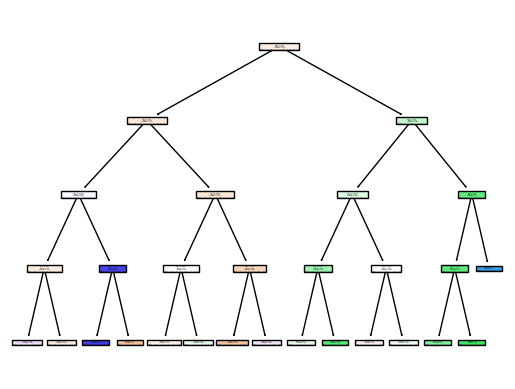

|--- feature_5 <= 3.15
|   |--- feature_5 <= 0.05
|   |   |--- feature_1 <= 1772.50
|   |   |   |--- feature_1 <= 88.50
|   |   |   |   |--- class: MF
|   |   |   |--- feature_1 >  88.50
|   |   |   |   |--- class: DF
|   |   |--- feature_1 >  1772.50
|   |   |   |--- feature_3 <= 4.50
|   |   |   |   |--- class: GK
|   |   |   |--- feature_3 >  4.50
|   |   |   |   |--- class: DF
|   |--- feature_5 >  0.05
|   |   |--- feature_1 <= 954.00
|   |   |   |--- feature_5 <= 0.85
|   |   |   |   |--- class: DF
|   |   |   |--- feature_5 >  0.85
|   |   |   |   |--- class: FW
|   |   |--- feature_1 >  954.00
|   |   |   |--- feature_5 <= 1.75
|   |   |   |   |--- class: DF
|   |   |   |--- feature_5 >  1.75
|   |   |   |   |--- class: MF
|--- feature_5 >  3.15
|   |--- feature_5 <= 9.55
|   |   |--- feature_1 <= 1423.00
|   |   |   |--- feature_6 <= 4.35
|   |   |   |   |--- class: FW
|   |   |   |--- feature_6 >  4.35
|   |   |   |   |--- class: FW
|   |   |--- feature_1 >  1423.00
|   |   |

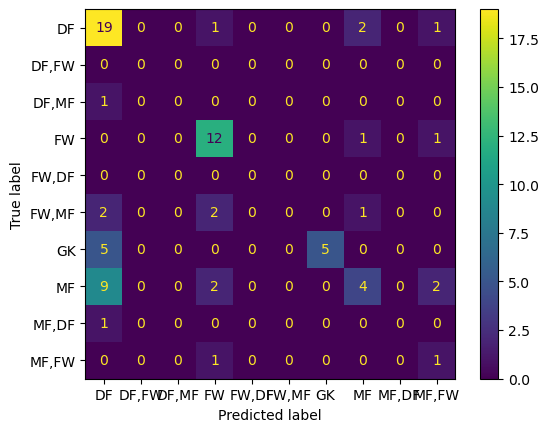

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtc_gini = DecisionTreeClassifier(max_depth=4, criterion='gini')

dtc_gini.fit(X_train, y_train)

# let plot how it divided it for now

plt.figure(figsize=(20, 10))
tree.plot_tree(dtc_gini, filled=True)
plt.show()
text_representation = tree.export_text(dtc_gini)
print(text_representation)


#predict and plot 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = dtc_gini.predict(X_test)
print("Avg accuracy:", dtc_gini.score(X_test, y_test))
cm = confusion_matrix(y_test, pred, labels=dtc_gini.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_gini.classes_)
disp.plot()

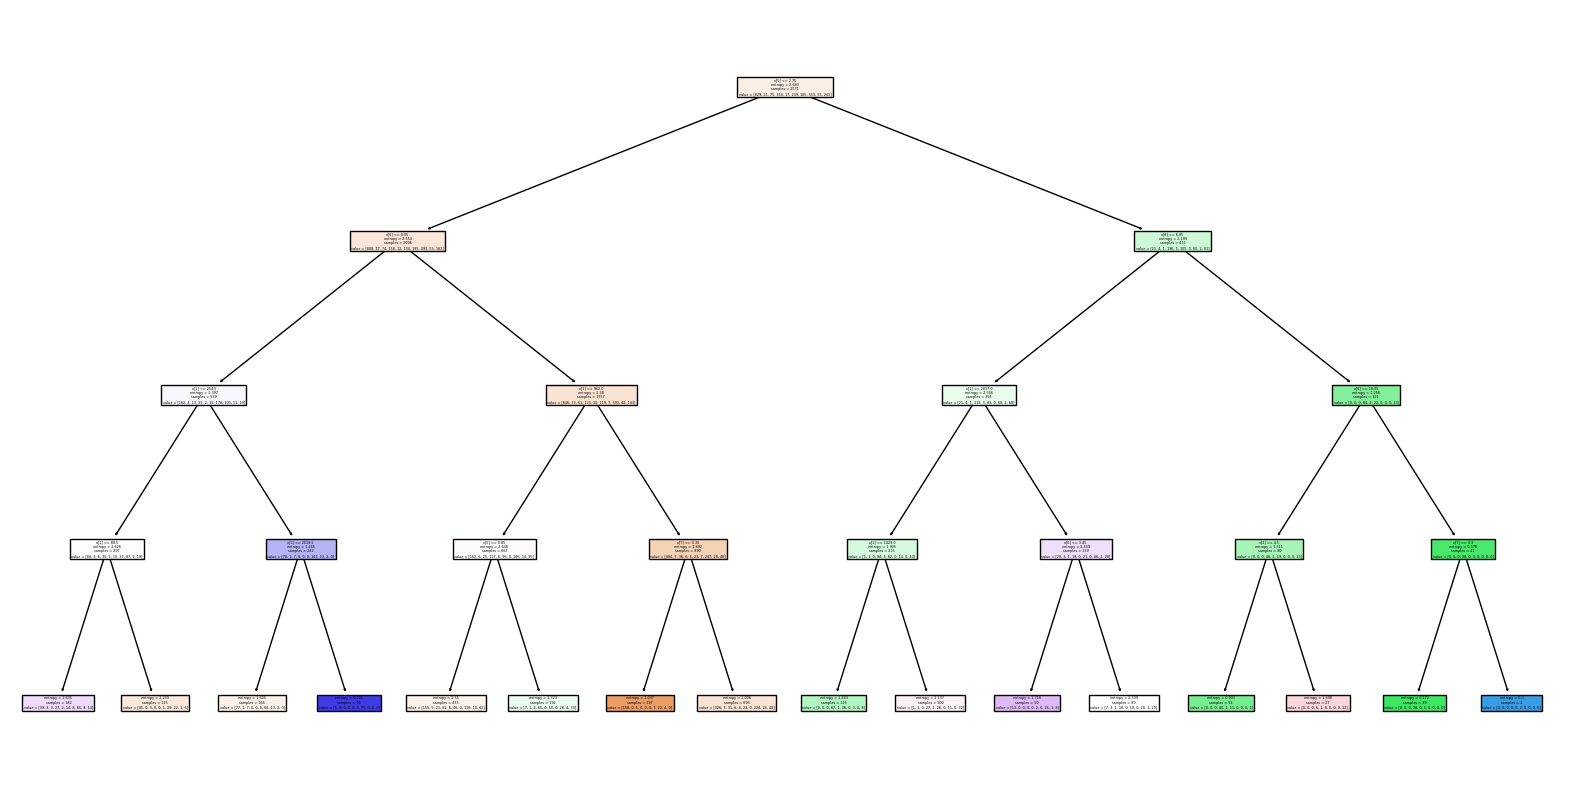

|--- feature_5 <= 2.75
|   |--- feature_5 <= 0.05
|   |   |--- feature_1 <= 254.50
|   |   |   |--- feature_1 <= 88.50
|   |   |   |   |--- class: MF
|   |   |   |--- feature_1 >  88.50
|   |   |   |   |--- class: DF
|   |   |--- feature_1 >  254.50
|   |   |   |--- feature_1 <= 2019.50
|   |   |   |   |--- class: DF
|   |   |   |--- feature_1 >  2019.50
|   |   |   |   |--- class: GK
|   |--- feature_5 >  0.05
|   |   |--- feature_1 <= 962.00
|   |   |   |--- feature_5 <= 0.85
|   |   |   |   |--- class: DF
|   |   |   |--- feature_5 >  0.85
|   |   |   |   |--- class: FW
|   |   |--- feature_1 >  962.00
|   |   |   |--- feature_7 <= 0.35
|   |   |   |   |--- class: DF
|   |   |   |--- feature_7 >  0.35
|   |   |   |   |--- class: DF
|--- feature_5 >  2.75
|   |--- feature_6 <= 6.85
|   |   |--- feature_1 <= 2037.00
|   |   |   |--- feature_1 <= 1423.00
|   |   |   |   |--- class: FW
|   |   |   |--- feature_1 >  1423.00
|   |   |   |   |--- class: MF,FW
|   |   |--- feature_1 >  2037

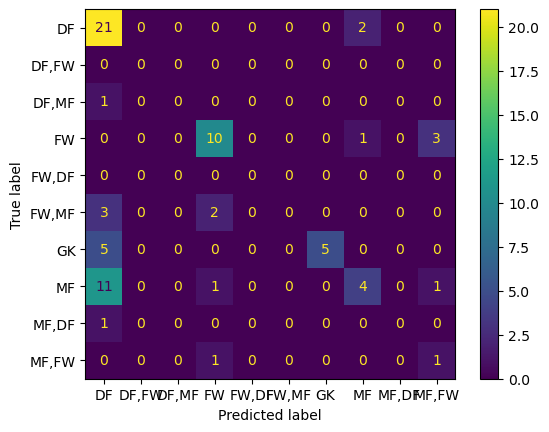

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtc_entropy = DecisionTreeClassifier(max_depth=4, criterion='entropy')

dtc_entropy.fit(X_train, y_train)

# let plot how it divided it for now

plt.figure(figsize=(20, 10))
tree.plot_tree(dtc_entropy, filled=True)
plt.show()
text_representation = tree.export_text(dtc_entropy)
print(text_representation)


#predict and plot 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = dtc_entropy.predict(X_test)
print("Avg accuracy:", dtc_entropy.score(X_test, y_test))
cm = confusion_matrix(y_test, pred, labels=dtc_entropy.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_entropy.classes_)
disp.plot()

3. Using the DecisionTree technique, study the impact of the pruning parameter a on the
classifier performance in terms of average accuracy. Consider the following
configurations of parameter a: [0, 0.005, 0.01, 0.02, 0.05, 0.1]. View the result
of the analysis via a graph (X axis = a factor, Y axis = average accuracy)

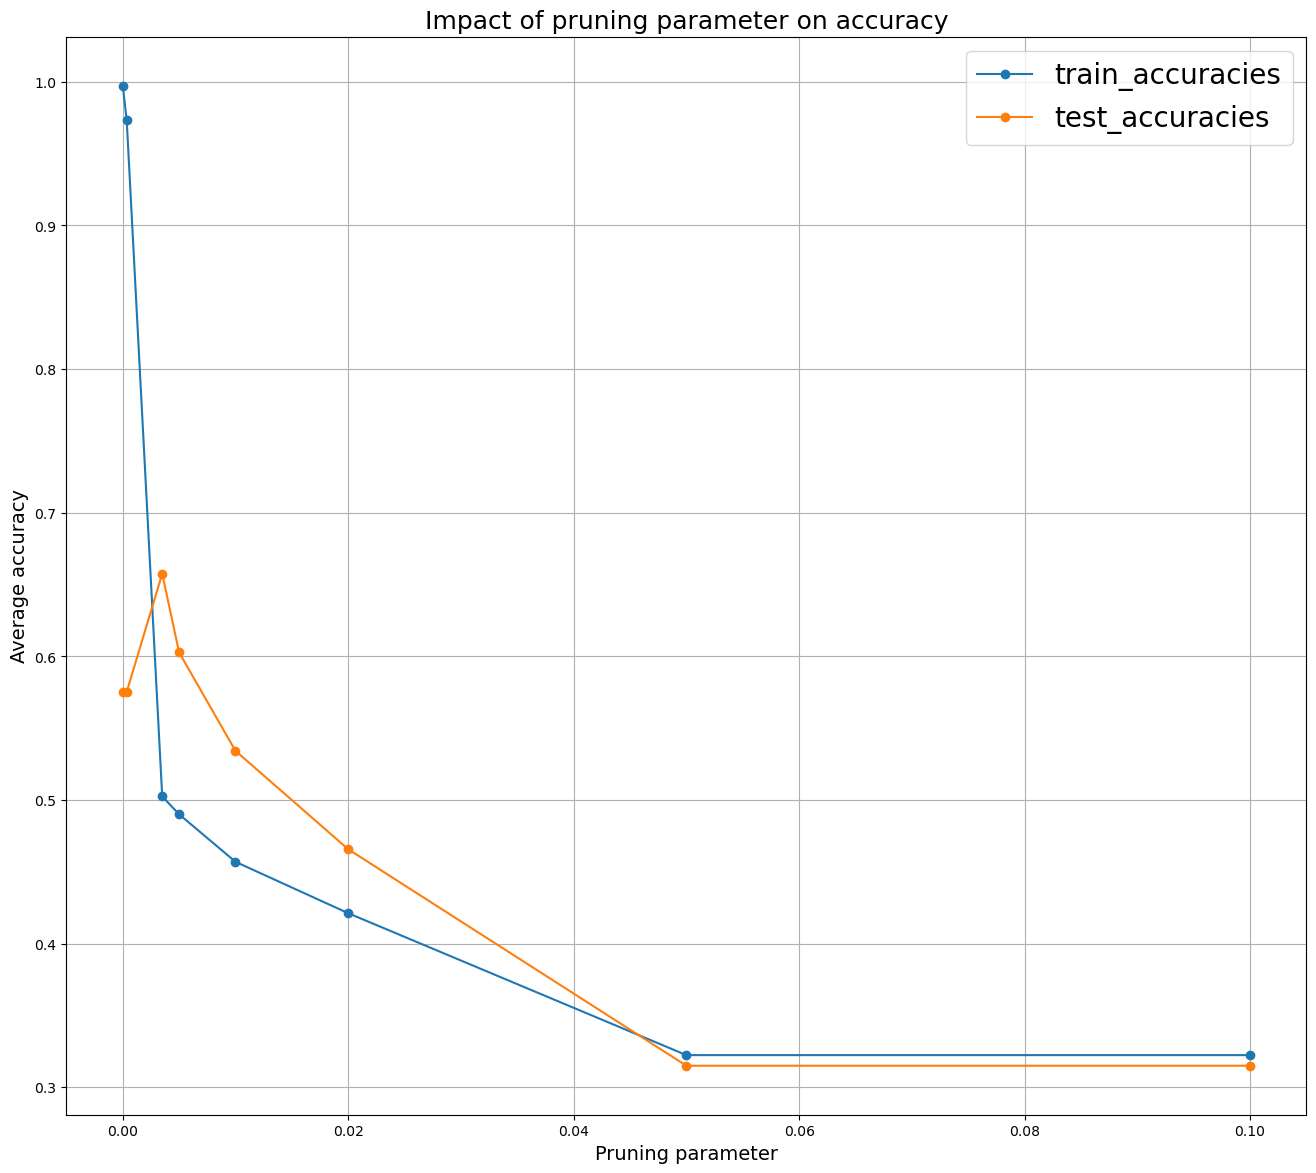

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

pruning_param = [0, 0.00035, 0.0035, 0.005, 0.01, 0.02, 0.05, 0.1]

train_accuracies = []
test_accuracies = []

for i in pruning_param:
    dtc = DecisionTreeClassifier(ccp_alpha=i, random_state=42)
    dtc.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, dtc.predict(X_train))
    test_acc = accuracy_score(y_test, dtc.predict(X_test))
    
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
plt.figure(figsize=(16, 14))
plt.plot(pruning_param, train_accuracies, label='train_accuracies', marker='o')
plt.plot(pruning_param, test_accuracies, label='test_accuracies', marker='o')    

plt.title('Impact of pruning parameter on accuracy', fontsize=18)
plt.xlabel('Pruning parameter', fontsize=14)
plt.ylabel('Average accuracy', fontsize=14)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
        

4. Using the RandomForest technique (n_estimators=20, max_depth=4, identify
the three most important variables for the classification process. Study the impact of
parameter of n_estimators on the performance of the classifier in terms of accuracy
average. Consider the following configurations of the n_estimators parameter: [1, 10, 20,
50, 100, 200].

Top 3 Most Important Features:
   Feature  Importance
5       xg    0.303078
6     npxg    0.237904
1  minutes    0.189296


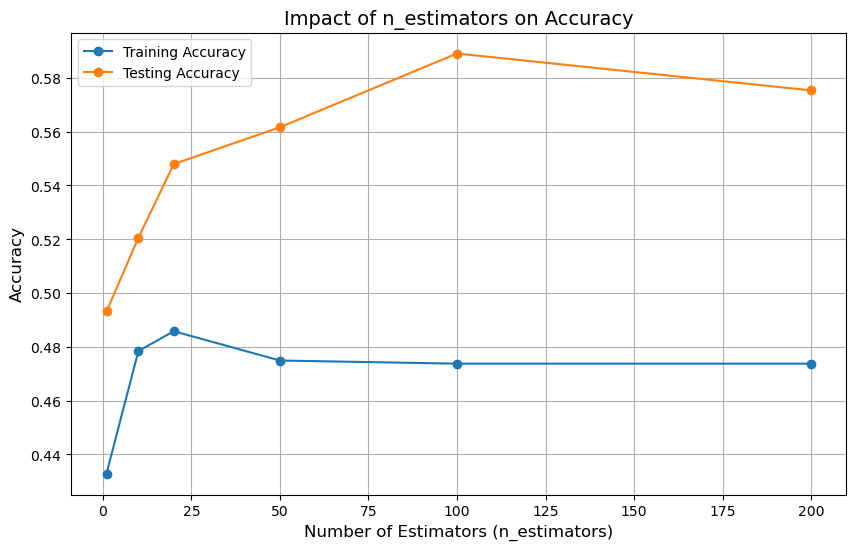

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Train a RandomForest with fixed parameters (n_estimators=20, max_depth=4)
rf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns 
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 3 important features
top_3_features = importance_df.head(3)
print("Top 3 Most Important Features:")
print(top_3_features)

# 2. Study the impact of n_estimators on accuracy
n_estimators_values = [1, 10, 20, 50, 100, 200]
train_accuracies = []
test_accuracies = []

for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, max_depth=4, random_state=42)
    rf.fit(X_train, y_train)
    
   
    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.title("Impact of n_estimators on Accuracy", fontsize=14)
plt.xlabel("Number of Estimators (n_estimators)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


5. Using the RandomForest technique, and the RandomizedSearchCV identify the values
optimal hyperparameters (n_estimators, impurity_measure, alpha, max_depth)
and calculate the resulting accuracy on the test set.

6. Using the GradientBoostingClassifier technique, study the impact of the parameters
n_estimators and learning_rate on the performance of the classifier in terms of
average accuracy. Consider the following configurations of the n_estimators parameter:
[1, 10, 20, 50, 100, 200], and learning_rate=[0.01, 0.05, 0.1, 0.2] View the
result of the analysis via a graph (X axis = factor n_estimators, Y axis
Average accuracy, four data sets for different learning_rates).